In [66]:
#Introducing the relevant packages 
import numpy as np 
import random, math 
import matplotlib.pyplot as plt

### Question 1

Text(0.5, 1.0, 'Simulations of $m(h)$ at Different h values')

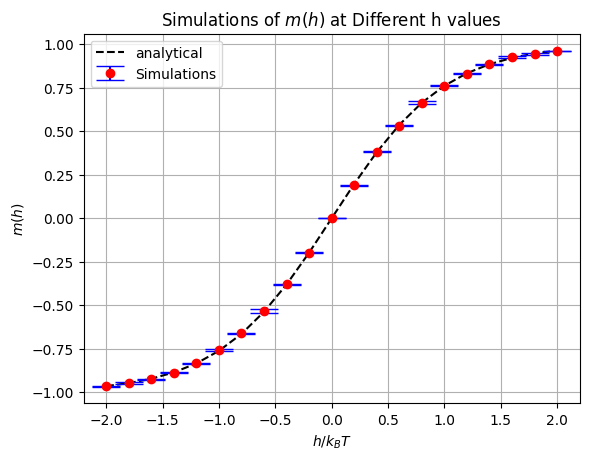

In [67]:
#Initializing variables
SIMULATION_TIME = 10000
K = 1
T = 1

#Plotting the analytical plot to overlay with simulation results 
x = np.arange(-2,2.2,0.2)
y = np.tanh(x/(K*T))


#Function to calculate the energy for each spin state
def calculate_energy(H,spin_state):
    energy = -H*spin_state
    return energy

# Simulation parameters
N_SIMULATIONS = 3
sim = np.zeros((N_SIMULATIONS, len(x)))

for n in range(N_SIMULATIONS):
    for index, h in enumerate(x):
        spin_state = np.zeros(SIMULATION_TIME)
        spin_state[0] = 1

        for t in range(1,SIMULATION_TIME):
            ##Calculate the energy of the proposed flip state and old spin state
            new_state = -spin_state[t-1]
            old_energy = calculate_energy(h,spin_state[t-1])
            new_energy = calculate_energy(h,new_state)

        #Checks if new state lowers energy to accept the state change
            if new_energy < old_energy:
                spin_state[t] = new_state
            else:
                #Only accepts state flip proportional to boltzmann factor
                random_number = np.random.random() 
                if random_number < np.exp(-(new_energy - old_energy)/ (K*T)):
                    spin_state[t] = new_state
                else:
                    spin_state[t] = spin_state[t-1]
        #Splicing array to only include spins at thermalization
        sim[n,index] = spin_state[int(SIMULATION_TIME/4):].mean()
    
#Using np. library to get the error between simulations    
sim_mean = sim.mean(axis=0)
sim_std = sim.std(axis=0)

plt.plot(x,y, label = "analytical", color = 'black', linestyle = '--')
plt.errorbar(x, sim_mean, yerr=sim_std, fmt='o', label = 'Simulations', color='red', ecolor='blue', capsize=10)
plt.xlabel("$h/k_BT$")
plt.ylabel("$m(h)$")
plt.legend()
plt.grid()
plt.title("Simulations of $m(h)$ at Different h values")


As depicted in the figure above, my results do agree with the analytical results with relatively small deviation from it. 

### Question 2

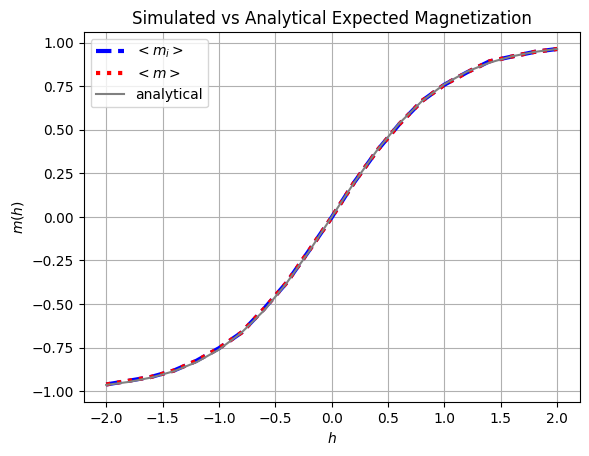

In [68]:
#Intializing parameters
SIMULATION_ITERATIONS =100
SIMULATION_TIME = 50000
K = 1
T = 1

#Initializing arrays for storing simulation data and values of dimensionless energy with varying h 
h_values = np.arange(-2,2.2,0.2)
analytical_energy = np.tanh(h_values)
sim_energy = np.zeros(len(h_values))
time_energy = np.zeros(len(h_values))
sim_mag = np.zeros(len(h_values))
delta_m = (1-analytical_energy**2)/SIMULATION_ITERATIONS
sim_delta_m = np.zeros(len(h_values))

#Scanning over the values of h in [-2:0.2:2] for each spin # iteration
for index, h in enumerate(h_values):

    spin = np.zeros((SIMULATION_TIME,SIMULATION_ITERATIONS))
    spin[0,:] = 1

#Monte Carlo simulation describing the system of non-interacting multiple spins
    for l in range(1,SIMULATION_TIME):
        random_spin = np.random.randint(0, SIMULATION_ITERATIONS) 
        new_state = -spin[l-1,random_spin]
        old_energy = calculate_energy(h,spin[l-1,random_spin])
        new_energy = calculate_energy(h,new_state)

        random_num = np.random.random()
        if new_energy < old_energy:
            spin[l,:] = spin[l-1,:]  #copies all spins t=l-1 to spin values of t=l
            spin[l,random_spin] = new_state 
            
        else:
            if random_num < np.exp(-(new_energy-old_energy)/(K*T)):
                spin[l,:] = spin[l-1,:]
                spin[l,random_spin] = new_state
            else:
                spin[l,:] = spin[l-1,:]

    #Computes the expected values of the spin according to their format in the 2D array
    time_energy[index] = sum(spin.mean(axis=1))/SIMULATION_TIME # Column entries are averaged (time steps)
    sim_energy[index] = sum(spin.mean(axis=0))/SIMULATION_ITERATIONS # Number of spins

    #Computes the expected magnetization squared for i=j spins in the system
    #Splices 2D array to have i!=j arrays to compute expected magnetization
    spin_i = spin[:,::2]
    spin_j = spin[:,1::2]
    ##Computes the expected value of m_i,j and dot products them
    sim_mag[index] = (spin_i*spin_j).mean()
     
    sim_delta_m[index] = (1-(sum(spin.mean(axis=0)/SIMULATION_ITERATIONS))**2)

#functions to plot the graphs
plt.xlabel('$h$')
plt.ylabel('$m(h)$')
plt.title('Simulated vs Analytical Expected Magnetization')
plt.plot(h_values, sim_energy, color = 'blue', linestyle = '--', linewidth = 3, label = '$<m_i>$')
plt.plot(h_values, time_energy, color = 'red', linestyle = ':', linewidth = 3, label = '$<m>$')
plt.plot(h_values, analytical_energy, color = "grey", label = 'analytical')
plt.legend()
plt.grid()

The simulation results both agree with the analytical data points.  

### 2.C

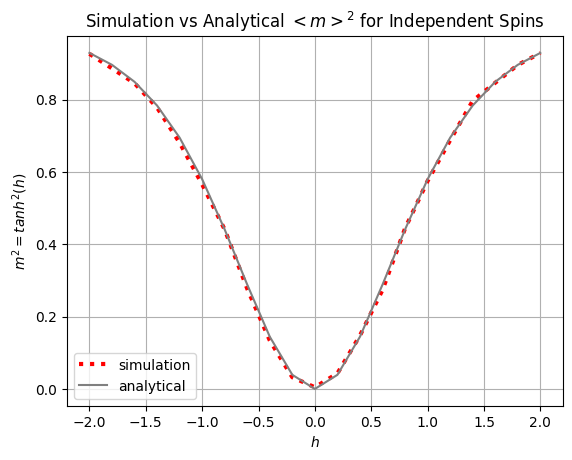

In [69]:
plt.plot(h_values, sim_mag, color = 'red', linestyle = ':', label = 'simulation',linewidth = 3)
plt.plot(h_values, analytical_energy**2, color = 'grey', label = 'analytical')
plt.xlabel('$h$')
plt.ylabel('$m^2 = tanh^2(h)$')
plt.title('Simulation vs Analytical $<m>^2$ for Independent Spins')
plt.grid()
plt.legend()

### 2.D

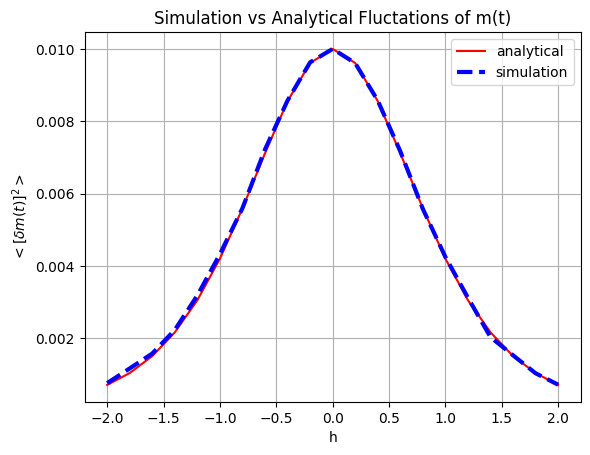

In [70]:
plt.xlabel('h')
plt.ylabel('$<[\delta m(t)]^2>$')
plt.title('Simulation vs Analytical Fluctations of m(t)')
plt.plot(h_values,delta_m, label = 'analytical', color = 'red')
plt.plot(h_values, sim_delta_m/SIMULATION_ITERATIONS, label = 'simulation', linewidth = 3, color = 'blue',linestyle='--')
plt.legend()
plt.grid()

### Question 3

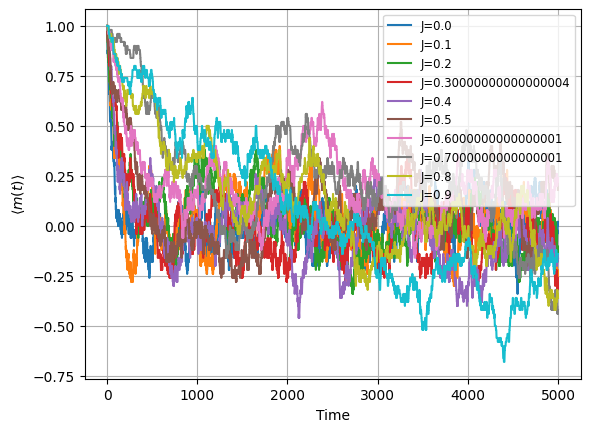

In [95]:
T,K = 1,1
h = 0

TIME_SIMULATIONS = 50000
SPIN_SIMULATIONS = 100

def pair_energy(h,J,spin_i,spin_j,spin_k):
    energy = -h*spin_i - J*spin_i*spin_j -J*spin_i*spin_k
    return energy

j_values = np.arange(0,1,0.1)


plt.figure()

for index, J in enumerate(j_values):

    for n in range(SPIN_SIMULATIONS):
        spin = np.zeros((TIME_SIMULATIONS, SPIN_SIMULATIONS))
        spin[0,:] = 1
        for l in range(1,TIME_SIMULATIONS):
            random_spin = np.random.randint(0,SPIN_SIMULATIONS)
            INDEX = (random_spin)%SPIN_SIMULATIONS

            new_state = -spin[l-1,INDEX]
            old_energy = pair_energy(h,J,spin[l-1,INDEX],spin[l-1,(INDEX+1) % SPIN_SIMULATIONS],spin[l-1,(INDEX-1)% SPIN_SIMULATIONS])
            new_energy = pair_energy(h,J,new_state,spin[l-1,(INDEX+1) % SPIN_SIMULATIONS], spin[l-1,((INDEX-1) % SPIN_SIMULATIONS)])
            #propose the spin flip if new energy is less than old energy

            if new_energy < old_energy:
                spin[l,:] = spin[l-1,:]
                spin[l,INDEX] = new_state
            else:
                rand_num = np.random.random()
                #Accept spin flip with probability proportional to boltzmann factor
                if rand_num < np.exp(-(new_energy-old_energy)/(K*T)):
                    spin[l,:] = spin[l-1,:]
                    spin[l,INDEX] = new_state
                else: spin[l,:] = spin[l-1,:]
    
    plt.plot(spin.mean(axis=1), label=f"J={J}")
    
plt.xlabel("Time")
plt.ylabel("$\\langle m(t)\\rangle$")
plt.grid()
plt.legend(fontsize = 'small', loc = 'best')
plt.show()


Same Monte Carlo simulation as above, however, varying the values of T and keep J,K = 1

### 3C

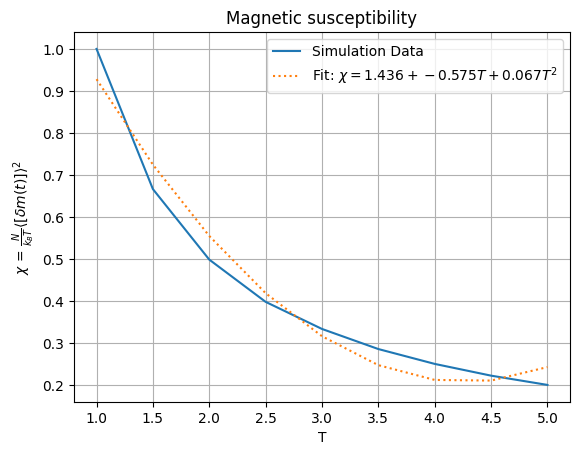

In [102]:
from numpy.polynomial.polynomial import Polynomial
J,K = 1,1
h = 0

TIME_SIMULATIONS = 10000
SPIN_SIMULATIONS = 100 

def pair_energy(h,J,spin_i,spin_j, spin_k):
    energy = -h*spin_i - J*spin_i*spin_j - J*spin_i*spin_k
    return energy
T_values = np.arange(1,5.5,0.5)
sim_mag = np.zeros(len(T_values))
spin_correlation = np.zeros((TIME_SIMULATIONS,SPIN_SIMULATIONS))
dot = np.zeros(len(T_values))

    
for index, t in enumerate(T_values):

    for n in range(SPIN_SIMULATIONS):
        spin = np.zeros((TIME_SIMULATIONS, SPIN_SIMULATIONS))
        spin[0,:] = 1
        for l in range(1,TIME_SIMULATIONS):
            random_spin = np.random.randint(0,SPIN_SIMULATIONS)
            INDEX = (random_spin)%SPIN_SIMULATIONS

            new_state = -spin[l-1,INDEX]
            old_energy = pair_energy(h,J,spin[l-1,INDEX],spin[l-1,(INDEX+1) % SPIN_SIMULATIONS],spin[l-1,(INDEX-1) % SPIN_SIMULATIONS])
            new_energy = pair_energy(h,J,new_state,spin[l-1,(INDEX+1) % SPIN_SIMULATIONS],spin[l-1,(INDEX-1) % SPIN_SIMULATIONS])
            #propose the spin flip if new energy is less than old energy

            if new_energy < old_energy:
                spin[l,:] = spin[l-1,:]
                spin[l,INDEX] = new_state
            else:
                rand_num = np.random.random()
                #Accept spin flip with probability proportional to boltzmann factor
                if rand_num < np.exp(-(new_energy-old_energy)/(K*t)):
                    spin[l,:] = spin[l-1,:]
                    spin[l,INDEX] = new_state
                else: spin[l,:] = spin[l-1,:]
        

    sim_mag[index] = sum(spin.mean(axis=0))/SPIN_SIMULATIONS


#Calculate magnetic susceptibility
chi = (1 - sim_mag**2) / T_values*K
#Fit a curve to the data
coefficients = Polynomial.fit(T_values, chi, deg=2).convert().coef
best_fit_curve = np.poly1d(coefficients[::-1])
chi_fit = best_fit_curve(T_values)

plt.plot(T_values,chi, label = 'Simulation Data')
plt.plot(T_values, chi_fit, ':', label=f'Fit: $\chi = {coefficients[0]:.3f}+{coefficients[1]:.3f}T+{coefficients[2]:.3f}T^2$')
plt.ylabel('$\chi$ = $\\frac{N}{k_BT} \\langle [ \delta m(t) ] \\rangle ^2$')
plt.xlabel('T')
plt.legend()
plt.title('Magnetic susceptibility')
plt.grid()


Yes, there are signs of $\chi$ becoming infinitely large as T-->0.

### 3D

Text(0, 0.5, 'spin i')

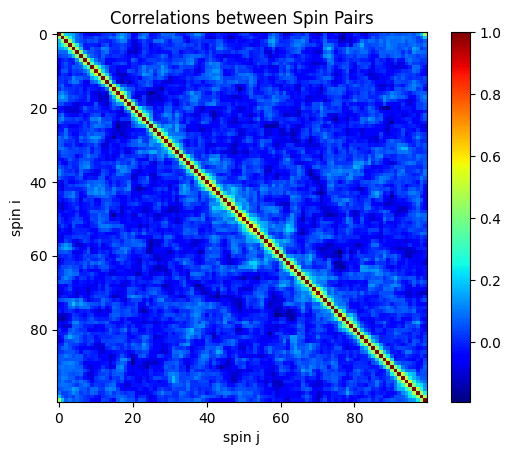

In [104]:
###Function to return the normalized spin correlation function
def monte_carlo(N,L,j,k,h,temperature):
    for n in range(N):
        spin = np.zeros((L, N))
        spin[0,:] = 1
        for l in range(1,L):
            random_spin = np.random.randint(0,N)
            INDEX = (random_spin) % N

            new_state = -spin[l-1,INDEX]
            old_energy = pair_energy(h,j,spin[l-1,INDEX],spin[l-1,(INDEX+1) % N],spin[l-1,(INDEX-1) % N])
            new_energy = pair_energy(h,j,new_state,spin[l-1,(INDEX+1) % N],spin[l-1,(INDEX-1) % N])
            #propose the spin flip if new energy is less than old energy

            if new_energy < old_energy:
                spin[l,:] = spin[l-1,:]
                spin[l,INDEX] = new_state
            else:
                rand_num = np.random.random()
                #Accept spin flip with probability proportional to boltzmann factor
                if rand_num < np.exp(-(new_energy-old_energy)/(k*temperature)):
                    spin[l,:] = spin[l-1,:]
                    spin[l,INDEX] = new_state
                else: spin[l,:] = spin[l-1,:]
        #Splicing the array to include thermalized spins (t = [L/2,L])
        thermalized_spin = spin[int(L*0.2):,:]
        #Computes correlation of spins with matrix multiplication
        correlation = (thermalized_spin.T@thermalized_spin)/(L-int(0.2*L))
        return correlation
    
SPIN_SIMULATIONS = 100 
TIME_SIMULATIONS = 50000

spin_correlation = monte_carlo(SPIN_SIMULATIONS, TIME_SIMULATIONS, 1,1,0,2)

plt.imshow(spin_correlation, cmap='jet')
plt.colorbar()
plt.title('Correlations between Spin Pairs')
plt.xlabel('spin j')
plt.ylabel('spin i')

### 3E

Text(0, 0.5, '$C(r)$')

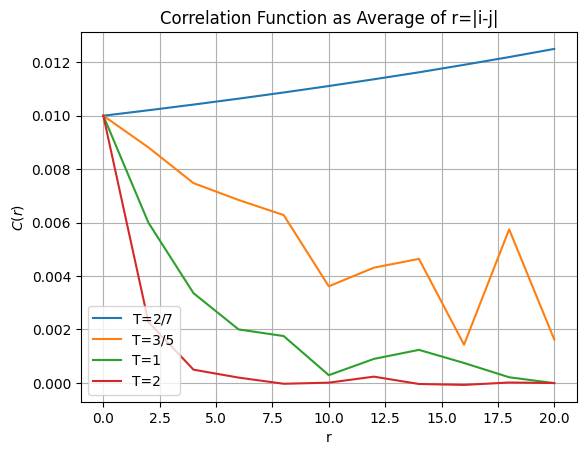

In [108]:
N_STEPS = 100
TIME_STEPS = 60000

r = np.arange(0,(N_STEPS/5)+2,2).astype(int)
cr1 = np.zeros(len(r))
cr2 = np.zeros(len(r))
cr3 = np.zeros(len(r))
cr4 = np.zeros(len(r))

for index, R in enumerate(r):
    factor = 1/(N_STEPS-R)
    
    spin_correlation = monte_carlo(N_STEPS,TIME_STEPS,1,1,0,2/7)
    spin_correlation2 = monte_carlo(N_STEPS,TIME_STEPS,1,1,0,3/5)
    spin_correlation3 = monte_carlo(N_STEPS,TIME_STEPS,1,1,0,1)
    spin_correlation4 = monte_carlo(N_STEPS,TIME_STEPS,1,1,0,2)

    cr1[index] = factor*np.diag(spin_correlation, k = R).mean()
    cr2[index] = factor*np.diag(spin_correlation2, k = R).mean()
    cr3[index] = factor*np.diag(spin_correlation3, k = R).mean()
    cr4[index] = factor*np.diag(spin_correlation4, k = R).mean()


plt.plot(r,cr1, label = 'T=$2/7$')
plt.plot(r,cr2, label = 'T=3/5')
plt.plot(r,cr3,label = 'T=1')
plt.plot(r,cr4,label = 'T=2')
plt.legend()
plt.grid()
plt.title('Correlation Function as Average of r=|i-j|')
plt.xlabel('r')
plt.ylabel('$C(r)$')

As temperature approaches zero, $C(r)\rightarrow\infty$ as seen from the blue line. However, as temperature increases, $C(r)$ behaves as an exponential decay.